# Data Visualization Dashboard Project

## Import packages

In [1]:
import eurostat
import pandas as pd
import openpyxl


In [2]:
import plotly.graph_objects as go
import numpy as np

In [3]:
data_out = '../data/'

## Setup colors

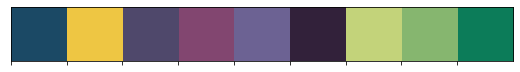

In [4]:
import seaborn as sns

sun_colors = ['#1b4965', '#EEC643', '#4F486B', '#824670', '#6C6293', '#32213A', '#c3d37a', '#86b66f', '#0c7c59']
DEFAULT_PALETTE = sns.color_palette(sun_colors)
sns.palplot(DEFAULT_PALETTE)


## Codes

In [5]:
siec_codes = eurostat.get_dic('siec')

geo_eu = [
'BE','BG','CZ','DK','DE',
'EE','IE','EL','ES','FR',
'HR','IT','CY','LV','LT',
'LU','HU','MT','NL','AT',
'PL','PT','RO','SI','SK',
'FI','SE','IS','LI','NO',
'CH',
]

geo_codes = {
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CZ': 'Czechia',
    'DK': 'Denmark',
    'DE': 'Germany',
    'EE': 'Estonia',
    'IE': 'Ireland',
    'EL': 'Greece',
    'ES': 'Spain',
    'FR': 'France',
    'HR': 'Croatia',
    'IT': 'Italy',
    'CY': 'Cyprus',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'HU': 'Hungary',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'AT': 'Austria',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'FI': 'Finland',
    'SE': 'Sweden',
    'IS': 'Iceland',
    'LI': 'Liechtenstein',
    'NO': 'Norway',
    'CH': 'Switzerland',
    'UK': 'United Kingdom'
}

x = ['R5110-5150_W6000RI',
 'R5200',
 'R5300',
 'RA000',
 'RA200',
 'RA410',
 'RA500_5160',
 'RA600',
 'W6210'
]

rs_codes = [
 'R5110-5150_W6000RI',
 'R5200', 
 'R5300', 
 'RA100',
 'RA200',
 'RA300',
 'RA410',
 'RA420', 
 'RA500_5160', 
 'RA600',
 'W6210',
# 'RA000',
           ]



## Get SIEC Timeseries

In [6]:
es_code = 'NRG_IND_COTD'
data = eurostat.get_data_df(str.lower(es_code), flags=False)

In [7]:
## Rename columns:
data.rename(columns={'geo\\time': 'Country Code', 'siec':'SIEC Code'}, inplace=True)

In [8]:
# Keep only selected countries
data = data.loc[data['Country Code'].isin(geo_eu),:]

In [9]:
# Remove extra rows in nrg_bal
# Keep only:
# Gross final consumption - energy use - overall target calculation without aviation cap adjustment 
# [GFC_E_OT_NAVICAPA]

data = data.loc[data['nrg_bal']=='GFC_E_OT_NAVICAPA',:]


In [10]:
# Remove unneccessary cols 
data.drop(columns=['nrg_bal','unit'], inplace=True)

In [11]:
data.reset_index(drop=True, inplace=True)

In [12]:
data['Country'] = data['Country Code']
data['Country'] = data['Country'].map(geo_codes)

In [13]:
data['SIEC'] = data['SIEC Code']
data['SIEC'] = data['SIEC'].map(siec_codes)

In [14]:
data.to_csv(data_out + 'renewables_percent_timeseries.csv', index=False)

## Get Energy Flow Data 

In [15]:
sk_code = 'NRG_BAL_SD'
skdata = eurostat.get_data_df(str.lower(sk_code), flags=False)

In [16]:
## AAS = Available from all sources
renewable_sources2020 = skdata.loc[skdata['geo\\time'].isin(geo_eu)].loc[skdata['nrg_bal']=='AAS',['geo\\time', 'nrg_bal', 'siec', 2020]]
renewable_sources2020.rename(columns={'geo\\time': 'Country Code'}, inplace=True)
renewable_sources2020.dropna(inplace=True)


#renewable_sources2020 = renewable_sources2020.loc[renewable_sources2020['siec'].isin(rs_codes)]

renewable_sources2020['SIEC'] = renewable_sources2020['siec'].map(siec_codes)
renewable_sources2020['Country'] = renewable_sources2020['Country Code'].map(geo_codes)

renewable_sources2020 = renewable_sources2020.rename(columns={
                                         2020: 'Consumption in KTOE',
                                         'siec': 'SIEC Code'
                                        }).reset_index(drop=True).drop(columns=['nrg_bal'])




In [17]:
siec_parent = {
    'RA000' : 'X',
    'RA600' : 'Other Renewable',
    'R5300' : 'Biomass',
    'R5200' : 'Biomass',
    'RA500_5160': 'Other Renewable',
    'R5110-5150_W6000RI' : 'Biomass',
    'W6210' : 'Other Renewable',
    'RA420' : 'Solar',
    'RA410' : 'Solar',
    'RA100' : '', 
    'RA200' : '', 
    'RA300' : '', 
    
    
    'E7000': '',
    
    'O4000': 'X',
    'O4100_TOT' : 'Oil and petroleum products',
    'O4200' : 'Oil and petroleum products',
    'O4652XR5210B' : 'Oil and petroleum products',
    'O4661XR5230B' : 'Oil and petroleum products',
    'O4671XR5220B' : 'Oil and petroleum products',
    'O4680' : 'Oil and petroleum products',
    'PP_OTH' : 'Oil and petroleum products',
    'O4200-4500': 'Oil and petroleum products',
    
    'SFF_P1000': 'X',
    'SFF_OTH' : 'Solid fossil fuels and peat',
    'C0121' : 'Solid fossil fuels and peat',
    'C0129' : 'Solid fossil fuels and peat',
    'C0220' : 'Solid fossil fuels and peat',
    'C0311' : 'Solid fossil fuels and peat',
    
    'W6100_6220': 'X',
    'W6220': 'Other non-renewable',
    
    'G3000_C0350-370': 'X',
    'G3000' : 'Gas',
    'C0350-0370' : 'Gas',
    
    
    'H8000' : 'Other non-renewable',
    'N900H' : 'Other non-renewable',
    'E7000' : 'Other non-renewable',
    'W6100' : 'Other non-renewable',

    'TOTAL' : 'X'
    
}




In [18]:
renewable_sources2020['Parent'] = renewable_sources2020['SIEC Code'].replace(siec_parent)
renewable_sources2020['Renewable'] = renewable_sources2020['SIEC Code'].isin(rs_codes)

renewable_sources2020.loc[renewable_sources2020['Renewable']==True,'Renewable'] = 'Renewable'
renewable_sources2020.loc[renewable_sources2020['Renewable']==False,'Renewable'] = 'Non-renewable'

In [19]:
renewable_sources2020.loc[renewable_sources2020['SIEC Code'] == renewable_sources2020['Parent'], 'SIEC'].unique()

array([], dtype=object)

In [20]:
df_be = pd.DataFrame(renewable_sources2020.loc[renewable_sources2020['Country Code']=='SE']
             .groupby(['SIEC', 'SIEC Code', 'Parent', 'Renewable' ]).sum()).reset_index().sort_values(by=['Parent'])


In [21]:
df_be.loc[df_be['Renewable']=='Renewable']

,SIEC,SIEC Code,Parent,Renewable,Consumption in KTOE
30,Wind,RA300,,Renewable,2366.8
9,Hydro,RA100,,Renewable,6224.3
1,Biogases,R5300,Biomass,Renewable,185.8
23,Primary solid biofuels,R5110-5150_W6000RI,Biomass,Renewable,9951.5
12,Liquid biofuels,R5200,Biomass,Renewable,2105.0
24,Renewable municipal waste,W6210,Other Renewable,Renewable,966.5
0,Ambient heat (heat pumps),RA600,Other Renewable,Renewable,1765.4
26,Solar photovoltaic,RA420,Solar,Renewable,90.4
27,Solar thermal,RA410,Solar,Renewable,10.4


In [22]:
renewable_sources2020 = renewable_sources2020.loc[renewable_sources2020['Parent']!='X']

In [23]:
renewable_sources2020['Sunburst_Parent'] = renewable_sources2020['Parent']
renewable_sources2020['Sunburst_SIEC'] = renewable_sources2020['SIEC']


In [24]:
renewable_sources2020.loc[renewable_sources2020['Sunburst_Parent']=='', 'Sunburst_Parent'] = renewable_sources2020.loc[renewable_sources2020['Sunburst_Parent']=='', 'SIEC']


In [25]:
renewable_sources2020.loc[renewable_sources2020['Parent']=='', 'Sunburst_SIEC'] = '' #= renewable_sources2020.loc[renewable_sources2020['Sunburst_Parent']=='', 'SIEC']


In [26]:
renewable_sources2020#['Sunburst_Parent'].unique()


,Country Code,SIEC Code,Consumption in KTOE,SIEC,Country,Parent,Renewable,Sunburst_Parent,Sunburst_SIEC
0,AT,C0121,1208.7,Coking coal,Austria,Solid fossil fuels and peat,Non-renewable,Solid fossil fuels and peat,Coking coal
1,BE,C0121,1143.2,Coking coal,Belgium,Solid fossil fuels and peat,Non-renewable,Solid fossil fuels and peat,Coking coal
2,CZ,C0121,2429.4,Coking coal,Czechia,Solid fossil fuels and peat,Non-renewable,Solid fossil fuels and peat,Coking coal
3,DE,C0121,7096.0,Coking coal,Germany,Solid fossil fuels and peat,Non-renewable,Solid fossil fuels and peat,Coking coal
4,ES,C0121,475.8,Coking coal,Spain,Solid fossil fuels and peat,Non-renewable,Solid fossil fuels and peat,Coking coal
...,...,...,...,...,...,...,...,...,...
822,PL,W6220,408.5,Non-renewable municipal waste,Poland,Other non-renewable,Non-renewable,Other non-renewable,Non-renewable municipal waste
823,PT,W6220,87.7,Non-renewable municipal waste,Portugal,Other non-renewable,Non-renewable,Other non-renewable,Non-renewable municipal waste
824,RO,W6220,2.4,Non-renewable municipal waste,Romania,Other non-renewable,Non-renewable,Other non-renewable,Non-renewable municipal waste
825,SE,W6220,892.1,Non-renewable municipal waste,Sweden,Other non-renewable,Non-renewable,Other non-renewable,Non-renewable municipal waste


In [27]:
#gparent = pd.DataFrame(s_.groupby(['Sunburst_Parent', 'Renewable']).size()).reset_index().drop(columns=[0])

#gparent.loc[gparent['Sunburst_Parent']=='Gas', 'Renewable'].values[0]

In [28]:
#s_ = renewable_sources2020.loc[(renewable_sources2020['Country Code']=='AT'),['Sunburst_SIEC','Sunburst_Parent','Consumption in KTOE', 'Renewable']]
#gparent = pd.DataFrame(s_.groupby(['Sunburst_Parent', 'Renewable']).size()).reset_index().drop(columns=[0])

#[ gparent.loc[gparent['Sunburst_Parent']==_, 'Renewable'].values[0] for _ in (s_['Sunburst_Parent'].unique()) ]

#[ _ for _ in (s_['Sunburst_Parent'].unique()) ]

#s_['Renewable'].unique()

In [29]:

renewable_sources2020.to_csv(data_out + 'renewable_sources_2020.csv', index=False)

In [30]:
renewable_sources2020.loc[(renewable_sources2020['Country']=='Austria') &( renewable_sources2020['Sunburst_Parent']=='Other Renewable')].sum()['Consumption in KTOE']
                                                                         

606.4

## Get GDP Data

In [31]:
gdp_cols = ['Country Code', 'Country'] + [i for i in range(2004, 2021, 1)]

In [32]:
gdp_code = 'nama_10_gdp'

In [33]:
gdpdata = eurostat.get_data_df(str.lower(gdp_code), flags=False)

In [34]:
## B1GQ = Gross domestic product at market prices
## CP_MNAC = Current prices, million euro

gdp_ts = gdpdata.loc[gdpdata['geo\\time'].isin(geo_eu)].loc[(gdpdata['na_item']=='B1GQ') &(gdpdata['unit']=='CP_MEUR'),]


gdp_ts.rename(columns={'geo\\time': 'Country Code'}, inplace=True)
gdp_ts['Country'] = gdp_ts['Country Code'].map(geo_codes)

gdp_ts = gdp_ts.loc[:, gdp_cols]
gdp_ts.dropna(inplace=True)
gdp_ts.reset_index(drop=True, inplace=True)
#gdp_ts.isna().sum()

In [35]:
gdp_ts.to_csv(data_out + 'gdp_data.csv', index=False)

In [36]:
data.loc[data['Country']=='Czechia']


,SIEC Code,Country Code,2020,2019,2018,2017,2016,2015,2014,2013,...,2011,2010,2009,2008,2007,2006,2005,2004,Country,SIEC
4,RA000,CZ,4507.576,4363.713,4079.709,4017.463,3950.971,3888.452,3792.574,3607.342,...,2867.460,2840.667,2615.304,2366.742,2160.874,2051.316,1965.736,1889.445,Czechia,Renewables and biofuels
33,TOTAL,CZ,26050.163,26871.963,26947.500,27146.892,26471.033,25803.247,25159.841,25900.973,...,26198.322,27019.873,26212.333,27287.018,27369.892,27864.304,27635.173,27896.874,Czechia,Total


In [37]:
#data.loc[data['Country']=='Slovakia']


In [38]:
renewable_sources2020

,Country Code,SIEC Code,Consumption in KTOE,SIEC,Country,Parent,Renewable,Sunburst_Parent,Sunburst_SIEC
0,AT,C0121,1208.7,Coking coal,Austria,Solid fossil fuels and peat,Non-renewable,Solid fossil fuels and peat,Coking coal
1,BE,C0121,1143.2,Coking coal,Belgium,Solid fossil fuels and peat,Non-renewable,Solid fossil fuels and peat,Coking coal
2,CZ,C0121,2429.4,Coking coal,Czechia,Solid fossil fuels and peat,Non-renewable,Solid fossil fuels and peat,Coking coal
3,DE,C0121,7096.0,Coking coal,Germany,Solid fossil fuels and peat,Non-renewable,Solid fossil fuels and peat,Coking coal
4,ES,C0121,475.8,Coking coal,Spain,Solid fossil fuels and peat,Non-renewable,Solid fossil fuels and peat,Coking coal
...,...,...,...,...,...,...,...,...,...
822,PL,W6220,408.5,Non-renewable municipal waste,Poland,Other non-renewable,Non-renewable,Other non-renewable,Non-renewable municipal waste
823,PT,W6220,87.7,Non-renewable municipal waste,Portugal,Other non-renewable,Non-renewable,Other non-renewable,Non-renewable municipal waste
824,RO,W6220,2.4,Non-renewable municipal waste,Romania,Other non-renewable,Non-renewable,Other non-renewable,Non-renewable municipal waste
825,SE,W6220,892.1,Non-renewable municipal waste,Sweden,Other non-renewable,Non-renewable,Other non-renewable,Non-renewable municipal waste
